##Aclaración
El siguiente código ha sido desarrollado por IAUAI y se encuentra con licencia de código abierto, así que siéntete libre de usarlo y modificarlo a tu gusto ✌

Comentarios adicionales:
*   Este código está pensando únicamente para ser corrido en Google Colab
*   Este código no es necesario para correr Proyecto_3_-_Bot_Mortiferum.ipynb. Sólo es un extra en caso de que se quiera usar otro personaje y/u otra dificultad

##Descargado de datos

Aquí podrías descargar otros juegos que te interesen más, aunque probablemente es más cómodo recolectarlos manualmente.

In [3]:
###Recuperado de: https://stackoverflow.com/questions/51046454/how-can-we-use-selenium-webdriver-in-colab-research-google-com
from IPython.display import clear_output
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
clear_output()
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
### (En pocas palabras, esto simula chrome y nos permite hacer cosas sofisticadas en internet, como descargar archivos)

#Aquí se descarga el juego
import time
wd.get("https://archive.org/download/No-Intro-Collection_2016-01-03_Fixed/Sega%20-%20Mega%20Drive%20-%20Genesis.zip/Mortal%20Kombat%203%20%28USA%29.zip")
time.sleep(10) #Hay que darle tiempo para que se descargue
wd.quit()

#Y aquí se extrae de su archivo zip
!unzip "./Mortal Kombat 3 (USA).zip"
!rm "./Mortal Kombat 3 (USA).zip"
clear_output()

#Finalmente, esto te permite descargar distintos estados (personajes) que habilitamos para Mortal kombat 3
!git clone https://github.com/IA-UAI/Proyecto_3_-_Bot_Mortiferum
%cd ./Proyecto_3_-_Bot_Mortiferum
%mv Estados ../
%cd ../
!rm -rf ./Proyecto_3_-_Bot_Mortiferum
clear_output()

##Configuración inicial

In [4]:
#Instalación y cargado de librerías
!pip install gym-retro
import retro
import matplotlib.pyplot as plt
from IPython import display
import gzip
import os
from tensorflow import one_hot
clear_output()

#Lista de juegos ya integrados en gym retro y que podrías usar (si tienes la respectiva ROM)
#Puede que encuentras alguno aquí: https://ia600201.us.archive.org/view_archive.php?archive=/7/items/No-Intro-Collection_2016-01-03_Fixed/Sega%20-%20Mega%20Drive%20-%20Genesis.zip
print(retro.data.list_games())

#Importación de juegos encontrados
roms = [os.path.join("./", rom) for rom in os.listdir("./") if (rom[-3:] == ".md")]
retro.data.merge(*roms, quiet=False)
dir_estados = "./Estados/" #(En caso de que tengas alguna configuración específica del juego con el que quieres trabajar)

['1942-Nes', '1943-Nes', '3NinjasKickBack-Genesis', '8Eyes-Nes', 'AaahhRealMonsters-Genesis', 'AbadoxTheDeadlyInnerWar-Nes', 'AcceleBrid-Snes', 'ActRaiser2-Snes', 'ActionPachio-Snes', 'AddamsFamily-GameBoy', 'AddamsFamily-Genesis', 'AddamsFamily-Nes', 'AddamsFamily-Sms', 'AddamsFamily-Snes', 'AddamsFamilyPugsleysScavengerHunt-Nes', 'AddamsFamilyPugsleysScavengerHunt-Snes', 'AdvancedBusterhawkGleylancer-Genesis', 'Adventure-Atari2600', 'AdventureIsland-GameBoy', 'AdventureIsland3-Nes', 'AdventureIslandII-Nes', 'AdventuresOfBatmanAndRobin-Genesis', 'AdventuresOfBayouBilly-Nes', 'AdventuresOfDinoRiki-Nes', 'AdventuresOfDrFranken-Snes', 'AdventuresOfKidKleets-Snes', 'AdventuresOfMightyMax-Genesis', 'AdventuresOfMightyMax-Snes', 'AdventuresOfRockyAndBullwinkleAndFriends-Genesis', 'AdventuresOfRockyAndBullwinkleAndFriends-Nes', 'AdventuresOfRockyAndBullwinkleAndFriends-Snes', 'AdventuresOfStarSaver-GameBoy', 'AdventuresOfYogiBear-Snes', 'AeroFighters-Snes', 'AeroStar-GameBoy', 'AeroTheAcroBa

##Generación de estado

Gym Retro no está pensado para ser precisamente interactivo, pero, con el fin de evitar descargarnos un software para generar los estados, llegamos a esta solución donde puedes ir ingresando comandos cada cierto rato. No es muy rápido, mas cumple con el trabajo 👍

Comandos
*   0: ㅤ B
*   1: ㅤ A
*   2: ㅤ MODE
*   3: ㅤ START
*   4: ㅤ UP
*   5: ㅤ DOWN
*   6: ㅤ LEFT
*   7: ㅤ RIGHT
*   8: ㅤ C
*   9: ㅤ Y
*   10:ㅤX
*   11:ㅤZ
*   12:ㅤNADA
*   a: ㅤ GUARDAR ESTADO
*   e: ㅤ SALIR SIN GUARDAR

(Fuente: https://github.com/openai/retro/blob/master/cores/genesis.json )


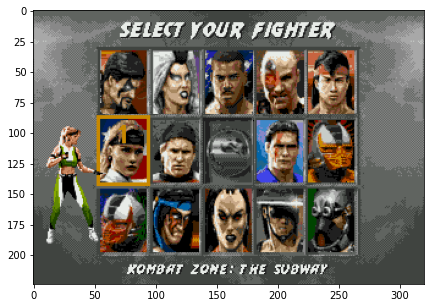

-1 frames restantes
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
{'matches_won': 0, 'wins': 0, 'enemy_matches_won': 0, 'enemy_health': 0, 'health': 0}
Prueba terminada


In [10]:
#Aquí se hace la selección

nombre_nuevo_estado = "ejemplo_de_nombre.state"
espacio_de_selección = ""
# espacio_de_selección = "MK_seleccion.state" #En caso de que quieras guardar varios personajes, con determinadas
#                                             #configuraciones, es conveniente que tengas un punto de control

def main(nombre_nuevo_estado, espacio_de_selección):
  env = retro.make(game='MortalKombat3-Genesis', state=0, use_restricted_actions=retro.Actions.ALL)
  obs = env.reset()
  if (espacio_de_selección != ""):
    f = gzip.open(dir_estados+espacio_de_selección,'rb')
    file_content = f.read()
    f.close()
    env.em.set_state(file_content)
  dimensiones = obs.shape[:2]
  frames_a_ver = 10000
  accion_0 = [0]*12
  repetir = False
  el_input = "0"
  while (frames_a_ver >= 0):
    if ((frames_a_ver-1)%100 == 0):
      el_input = input()
      while (not el_input.isnumeric()) and (el_input != "a") and (el_input != "e"):
        el_input = input()
      if (el_input == "a"):
        content = env.em.get_state()
        with gzip.open(nombre_nuevo_estado, 'wb') as f:
            f.write(content)
        frames_a_ver = -1
        el_input = 12
      if (el_input == "e"):
        frames_a_ver = -1
        el_input = 12
      if (int(el_input) <= 12):
        accion = one_hot(int(el_input), 12).numpy().astype(int).tolist()
      else:
        accion = [1]*12
        repetir = True
      obs, rew, done, info = env.step(accion)
      display.clear_output(wait=True)
      plt.figure(figsize=(dimensiones[0]/32, dimensiones[1]/32))
      plt.imshow(obs[:,:,:])
      plt.show()
      print(frames_a_ver, "frames restantes")
      print(accion)
      print(info)
      repetir = False
    else:
      if repetir:
        obs, rew, done, info = env.step(accion)
        repetir = False
      else:
        obs, rew, done, info = env.step(accion_0)
        if ((frames_a_ver-1)%100 == 1) and (frames_a_ver < 9900):
          plt.figure(figsize=(dimensiones[0]/32, dimensiones[1]/32))
          plt.imshow(obs[:,:,:])
          plt.show()
    if done:
      obs = env.reset()
    frames_a_ver -= 1
  env.close()
  print("Prueba terminada")

if __name__ == "__main__":
  main(nombre_nuevo_estado, espacio_de_selección)

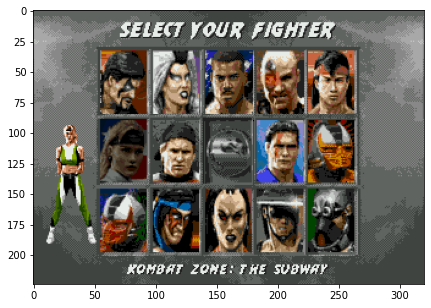

0 frames restantes
{'matches_won': 0, 'wins': 0, 'enemy_matches_won': 0, 'enemy_health': 0, 'health': 0}
MultiBinary(12)
Prueba terminada


In [13]:
#Esto te permitirá corroborar que el estado se haya guardado correctamente
def main(nombre_nuevo_estado):
  env = retro.make(game='MortalKombat3-Genesis')
  obs = env.reset()
  f = gzip.open(nombre_nuevo_estado,'rb')
  file_content = f.read()
  f.close()
  env.em.set_state(file_content)
  dimensiones = obs.shape[:2]
  frames_a_ver = 200
  while (frames_a_ver >= 0):
    obs, rew, done, info = env.step(env.action_space.sample())
    display.clear_output(wait=True)
    plt.figure(figsize=(dimensiones[0]/32, dimensiones[1]/32))
    plt.imshow(obs[:,:,:])
    plt.show()
    print(frames_a_ver, "frames restantes")
    print(info)
    if done:
      obs = env.reset()
    frames_a_ver -= 1
  print(env.action_space)
  env.close()
  print("Prueba terminada")

if __name__ == "__main__":
  main(nombre_nuevo_estado)

In [14]:
#En último lugar, aquí puedes descargarlo
from google.colab import files
files.download(nombre_nuevo_estado)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>